<a href="https://colab.research.google.com/github/anmaxwell/UniNotebooks/blob/master/TestCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


(28, 28)

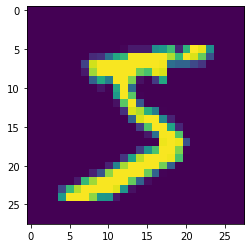

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
X_train[0].shape

Reshape the images - 1 to indicate a grayscale image. 3 would be r,g,b.

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

‘one-hot-encode’ the target variable

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten


Create a model, using the Sequential model type, which lets you build a model by adding on one layer at a time.

In [0]:
model = Sequential()

Add model layers: the first two layers are Conv2D—2-dimensional convolutional layers These are convolution layers that deal with the input images, which are seen as 2-dimensional matrices. The Conv2D function takes four parameters:

*Number of neural nodes in each layer. We will use 64 for the first convolutional layer and 32 for the second.

*kernel_size defines the filter size—this is the area in square pixels the model will use to “scan” the image. Kernel size of 3 means the model looks at a square of 3×3 pixels at a time.

*activation is the type of activation function (click to learn more in our neural network guide) we use after each convolutional layer. For CNN the typical activation function used is ReLu.

*input_shape is the pixel size of the images and the image depth, again setting 1 for grayscale.

In [0]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

Add a ‘Flatten’ layer, which takes the output of the two convolution layers and turns it into a format that can be used by the final, densely connected neural layer.

In [0]:
model.add(Flatten())

Add the final layer of type ‘Dense’, a densely-connected neural layer which will generate the final prediction. The Dense function takes two arguments:

*Number of output nodes—10 in our case because we need to generate predictions for digits between 0-9.

*Type of activation function for the output layer. We use softmax which is the typical activation function used for neural output layers. Softmax takes the Dense layer output and converts it to meaningful probabilities for each of the digits, which sum up to 1. It then makes a prediction based on the digit that has the highest probability.

In [0]:
model.add(Dense(10, activation='softmax'))

Compile the model. The compile function takes three parameters:

*optimizer controls the learning rate, which defines how fast optimal weights for the model are calculated (learn more about hyperparameters in our neural network guide). We will use the ‘adam’ learning rate optimizer.

*loss defines the loss function, which measures how far the model’s prediction is from the ground truth, the correct digits for the images (learn more about loss functions and the backpropagation process). We will use ‘categorical_crossentropy’, a loss function suitable for classification problems.

*metrics defines how we evaluate model success. We’ll use the ‘accuracy’ metric to calculate an accuracy score on the testing/validation set of images.

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 165s 88ms/step - loss: 0.2223 - accuracy: 0.9527 - val_loss: 0.1000 - val_accuracy: 0.9667
Epoch 2/3
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0659 - accuracy: 0.9805 - val_loss: 0.0713 - val_accuracy: 0.9776
Epoch 3/3
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.1024 - val_accuracy: 0.9729


Predict will return the %ages so using argmax to get the predicted value

In [28]:
import numpy as np

np.argmax(model.predict(X_test[:4]), axis=-1)

array([7, 2, 1, 0])

In [29]:
np.argmax(y_test[:4], axis=-1)

array([7, 2, 1, 0])